## Examples for Lecture 10
# Lab 10.1: Dimensional reduction

In [1]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.datasets import make_friedman1
import sklearn.decomposition as skd

In [24]:
""" 
Make sparse data set
in 3 dimensions. Observations lie on two 
axes (group)
""" 
N = 30
P = 3 
numComp=2 
group=np.random.randint(2,size=N)
Z=np.zeros((N,P))
Z[:,0]=group
Z[:,1]=1-group
Latent=np.random.uniform(-1,1,(N,P))*Z
Noise=np.random.normal(0,0.1,(N,P))
A = np.array([[0.7,-0.7,0],[0.7,0.7,0],[0,0,0]])
B = np.array([[0.8,0.3,0],[0.2,0.7,0],[0,0,2]])
Y=Latent@A+Noise@B

In [46]:
Y

array([[-0.41965762, -0.54446452,  0.24928102],
       [-0.75063999,  0.61323896, -0.06111378],
       [-0.45274417,  0.54911706, -0.24947542],
       [ 0.10183307, -0.0846905 , -0.19673371],
       [ 0.5292497 ,  0.53261996, -0.00435037],
       [-0.22853697,  0.34760401,  0.01421756],
       [-0.61980946,  0.45245347, -0.07200112],
       [ 0.44582115,  0.54033997,  0.20380124],
       [ 0.13180843,  0.10141331,  0.06722886],
       [ 0.00637865,  0.06109106, -0.12041719],
       [ 0.21394295,  0.24818578,  0.15913596],
       [ 0.20682919, -0.40690172,  0.32820953],
       [-0.0169588 , -0.00305597,  0.12550581],
       [ 0.65704232, -0.50585909,  0.11560338],
       [-0.28014546,  0.3707654 ,  0.07965038],
       [ 0.60586543, -0.41431392,  0.06097821],
       [ 0.20396802, -0.25366453, -0.31714043],
       [ 0.61559706,  0.60296242,  0.35255989],
       [-0.66229823, -0.64920982,  0.01771399],
       [-0.07793961, -0.20747888, -0.1850523 ],
       [-0.45385768, -0.48775236, -0.162

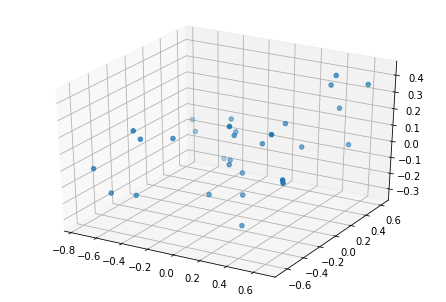

In [47]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y[:,0],Y[:,1],Y[:,2])

array([0.21575884, 0.15239364])

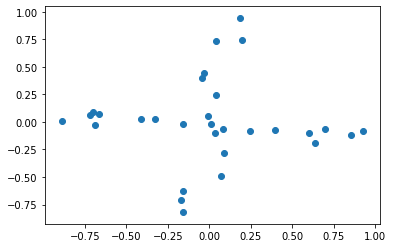

In [55]:
# Do normal PCA on the data set 
nPCA = skd.PCA(n_components=2)
nPCA.fit(Y)
nPCA.explained_variance_
Z1 = nPCA.transform(Y)
plt.scatter(Z1[:,0],Z1[:,1])
nPCA.components_
nPCA.explained_variance_

D:\Program Files\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


array([[-1.78697348,  0.        ,  0.        ],
       [ 0.        , -1.78109839,  0.        ]])

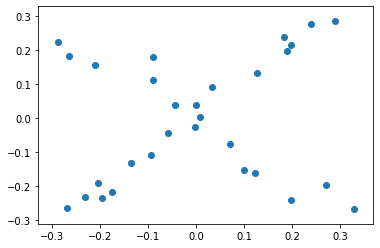

In [57]:
# Now do sparse PCA (Y= ZV), inforcing sparseness on V - that means 
# only a few of the original variables should on each latent factor 
sPCA = skd.SparsePCA(n_components=2,random_state=0,alpha=0.5)
sPCA.fit(Y) 
Z2 = sPCA.transform(Y)  # This are the the Z  
plt.scatter(Z2[:,0],Z2[:,1])
#Z2.shape
sPCA.components_ # This is V 

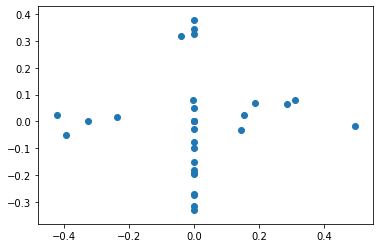

In [36]:
# Now to sparse PCA (Y = ZV), with L1- penalty on Z. 
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA
# Since Sklearn imposes the Penalty on V by default, we transform the problem 
# Y = Z V (Y_old.T = V_old.T Z_old.T)
# You can now play around with alpha 
sPCA = skd.SparsePCA(n_components=2,random_state=0,alpha=0.1)
sPCA.fit(Y.T) 
Z3 = sPCA.components_.T  # These are now the Z in the new space
plt.scatter(Z3[:,0],Z3[:,1])